<a href="https://colab.research.google.com/github/eduardofarina/workshopIAsaude/blob/master/WORKSHOP_IA_SAUDE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pessoal, vamos tentar replicar as técnicas utilizadas pelo artigo proposto no início do worskhop, em um dataset público que replica o grande estudo de Framingham.

In [17]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt


In [2]:
# Importar do Kaggle
!pip3 install -q kaggle

kjson = pd.read_json('kaggle.json',typ='series')

In [3]:
# Coloque suas credenciais kaggle
os.environ['KAGGLE_USERNAME']= "eduardofarina"
os.environ['KAGGLE_KEY']= kjson.key

In [4]:
# baixar o dataset
!kaggle datasets download -d amanajmera1/framingham-heart-study-dataset

  0% 0.00/58.0k [00:00<?, ?B/s]
100% 58.0k/58.0k [00:00<00:00, 22.5MB/s]


In [5]:
# unzip o dataset
!unzip framingham-heart-study-dataset.zip

Archive:  framingham-heart-study-dataset.zip
  inflating: framingham.csv          


In [6]:
# Fazer a leitura do banco de dados com a biblioteca Pandas.
# Pandas é como um "excel" do Python.
data = pd.read_csv('framingham.csv')

In [7]:
# Verificar o formato do banco de dados.
data.shape

(4240, 16)

In [8]:
# trocar o nome das colunas do dataset para potuguês

data.columns = ['masculino', 
               'idade', 
               'educação',
               'fumante_atual', 
               'cigarros_por_dia', 
               'remedioHAS',
               'AVCp', 
               'hipertensão_pre', 
               'diabetes', 
               'colesterol_total', 
               'pressao_sistolica',
               'pressao_diastolica', 
               'IMC', 
               'feq_cardiaca', 
               'glicose', 
               '10anosDCH']

In [9]:
# Verificiar o formato do dataset só por sua cabeça, ver como os dados estão.

data.head()

,masculino,idade,educação,fumante_atual,cigarros_por_dia,remedioHAS,AVCp,hipertensão_pre,diabetes,colesterol_total,pressao_sistolica,pressao_diastolica,IMC,feq_cardiaca,glicose,10anosDCH
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


### Dicionário de Dados
* Masculino 
* Idade
* Educação
    *1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational 4 = college
* Fumante atualmente
* Cigarros por dia
* Pressão Arterial Media
* AVC prevalente 
* Hipertensão prevalente
* Diabetes
* Colesterol_total
* Pressão Arterial Sistolica
* Pressão Diastolica
* IMC
* Frequência cardiaca
* Glicose
* Doença cardiovascular*

*Desfecho!

## Score de Framingham
### Em homens
LHomem = β x ln(Idade) 
     + β x ln(Total colesterol) 
     + β x ln(HDL colesterol) 
     + β x ln (PA sistólica)
     + β x tratado para pressão arterial
     + β x Fumante + β x ln (Idade) x ln (Colesterol total)
     + β x ln (Idade) x Fumante
     + β x ln (Idade) x ln (Idade)
     **- 172.300168**

PMen = 1 - 0.9402^exp(LMen)

### Em mulheres
LMulher = β x ln (idade) + β x ln(colesterol total) + β x ln(colesterol HDL) + β x ln(pressão arterial sistólica) + β x Tratados para pressão arterial + β x Fumante + β x ln(idade) x ln(colesterol total) + β x ln(idade) x Fumante **- 146.5933061**
PWomen = 1 - 0,98767 ^ exp (AWomen)

| Variáveis | Homens Coef. | Mulheres Coef. |
| --- | --- | --- |
| ln(idade) | 52.00961 | 31.764001 |
| ln(colesterol total) | 20.014077 | 22.465206 |
| ln(colesterol HDL) | -0,905964 | -1.187731
| ln(PA sistólica) | 1.305784 | 2.552905 |
| Tratada para pressão arterial * | 0,241549 | 0,420251 |
| Fumante * | 12.096316 | 13.07543
| ln(idade) x ln(colesterol total) | -4,605038 | -5,060998 |
| ln(Idade) x Fumante ** | -2,84367 | -2,996945 |
| ln(idade) x ln(idade) | -2,93323 | - |

* *Sim ou não = 0 ou 1
* **Homens: se tiver> 70 anos, use ln (70) x Fumante. 
* **Mulheres: se tiver> 78 anos, use ln (78) x Fumante.

In [10]:
# Verificar se existem linhas duplicadas (o mesmo paciente em duas linhas diferentes)
duplicate_df = data[data.duplicated()]
duplicate_df

,masculino,idade,educação,fumante_atual,cigarros_por_dia,remedioHAS,AVCp,hipertensão_pre,diabetes,colesterol_total,pressao_sistolica,pressao_diastolica,IMC,feq_cardiaca,glicose,10anosDCH


In [11]:
# Verificar se existem valores faltantes. Valores nulos.

data.isnull().sum()

masculino               0
idade                   0
educação              105
fumante_atual           0
cigarros_por_dia       29
remedioHAS             53
AVCp                    0
hipertensão_pre         0
diabetes                0
colesterol_total       50
pressao_sistolica       0
pressao_diastolica      0
IMC                    19
feq_cardiaca            1
glicose               388
10anosDCH               0
dtype: int64

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


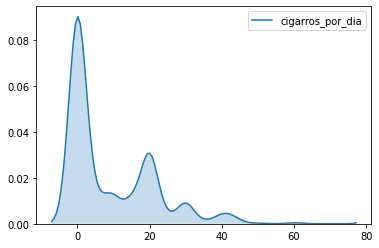

In [12]:
# Fazer um density plot, para olhar a distribuição da variável.

import seaborn as sns
sns.kdeplot(data['cigarros_por_dia'], shade=True)

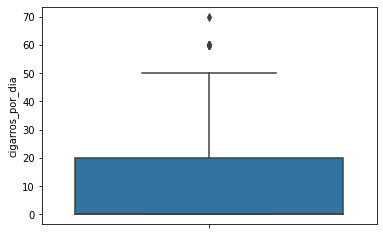

In [13]:
# Boxplot para avaliar distribuiçao da amostra e presença de outliers.
sns.boxplot(y = data['cigarros_por_dia'])

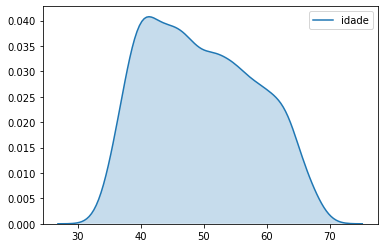

In [14]:
sns.kdeplot(data['idade'], shade=True)

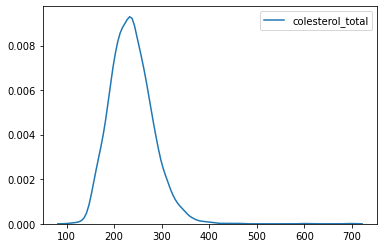

In [15]:
sns.kdeplot(data['colesterol_total'])

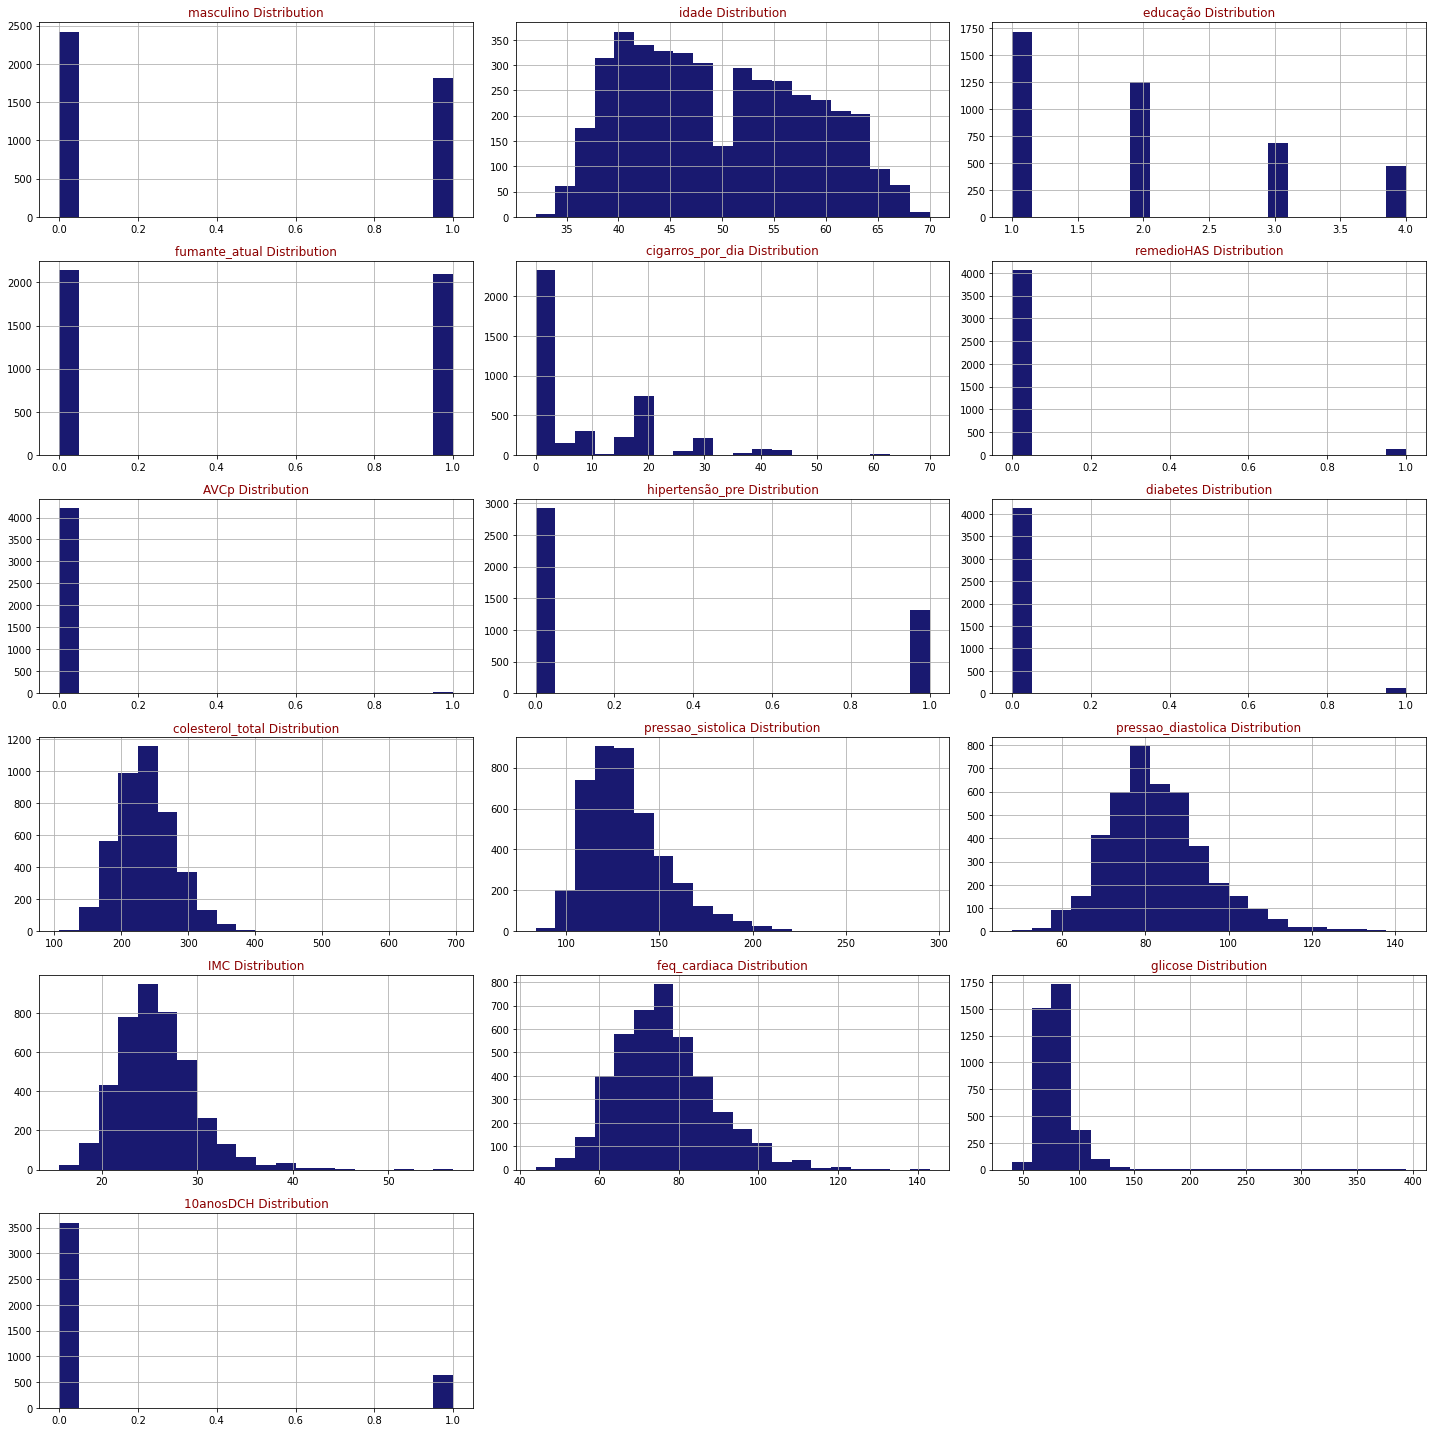

In [22]:
def draw_histograms(dataframe, colunas, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, colunas in enumerate(colunas):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[colunas].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(colunas +" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(data,data.columns,6,3)

In [24]:
# importando a biblioteca para realizar a divisão em treino e teste.
from sklearn.model_selection import train_test_split

In [25]:
# definindo as variáveis input
X = data.drop(columns = ['10anosDCH'])

In [26]:
# definindo a variável output  
y = data['10anosDCH']

In [27]:
# separando em treino e teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
# Importando a biblioteca que realiza o tratamento de valores faltantes
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

In [29]:
# COlocando os valores faltantes do teste.
imp_mean.fit(X_train[['cigarros_por_dia', 'colesterol_total', 'IMC', 'glicose', 'feq_cardiaca' ]])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [30]:
X_train[['cigarros_por_dia', 'colesterol_total', 'IMC', 'glicose', 'feq_cardiaca' ]] = 
imp_mean.transform(X_train[['cigarros_por_dia', 'colesterol_total', 'IMC', 'glicose', 'feq_cardiaca' ]])

SyntaxError: ignored

In [31]:
X_train.isnull().sum()

masculino               0
idade                   0
educação               86
fumante_atual           0
cigarros_por_dia       25
remedioHAS             45
AVCp                    0
hipertensão_pre         0
diabetes                0
colesterol_total       43
pressao_sistolica       0
pressao_diastolica      0
IMC                    12
feq_cardiaca            1
glicose               305
dtype: int64

In [32]:
X_train['educação'].mode()

0    1.0
dtype: float64

In [33]:
X_train['remedioHAS'].mode()

0    0.0
dtype: float64

In [34]:
X_train['educação'].fillna(1,inplace=True)
X_train['remedioHAS'].fillna(0,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [35]:
X_train.isnull().sum()

masculino               0
idade                   0
educação                0
fumante_atual           0
cigarros_por_dia       25
remedioHAS              0
AVCp                    0
hipertensão_pre         0
diabetes                0
colesterol_total       43
pressao_sistolica       0
pressao_diastolica      0
IMC                    12
feq_cardiaca            1
glicose               305
dtype: int64

In [36]:
X_test.isnull().sum()

masculino              0
idade                  0
educação              19
fumante_atual          0
cigarros_por_dia       4
remedioHAS             8
AVCp                   0
hipertensão_pre        0
diabetes               0
colesterol_total       7
pressao_sistolica      0
pressao_diastolica     0
IMC                    7
feq_cardiaca           0
glicose               83
dtype: int64

In [37]:
imp_mean.fit(X_test[['cigarros_por_dia', 'colesterol_total', 'IMC', 'glicose' ]])
X_test[['cigarros_por_dia', 'colesterol_total', 'IMC', 'glicose' ]] = imp_mean.transform(X_test[['cigarros_por_dia', 'colesterol_total', 'IMC', 'glicose' ]])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [38]:
X_test.isnull().sum()

masculino              0
idade                  0
educação              19
fumante_atual          0
cigarros_por_dia       0
remedioHAS             8
AVCp                   0
hipertensão_pre        0
diabetes               0
colesterol_total       0
pressao_sistolica      0
pressao_diastolica     0
IMC                    0
feq_cardiaca           0
glicose                0
dtype: int64

In [39]:
X_test.educação.mode()

0    1.0
dtype: float64

In [40]:
X_test.remedioHAS.mode()

0    0.0
dtype: float64

In [41]:
X_test.remedioHAS.fillna(0, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [42]:
X_test.educação.fillna(1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [43]:
X_test.isnull().sum()

masculino             0
idade                 0
educação              0
fumante_atual         0
cigarros_por_dia      0
remedioHAS            0
AVCp                  0
hipertensão_pre       0
diabetes              0
colesterol_total      0
pressao_sistolica     0
pressao_diastolica    0
IMC                   0
feq_cardiaca          0
glicose               0
dtype: int64

In [44]:
X_test.columns.to_list()

['masculino',
 'idade',
 'educação',
 'fumante_atual',
 'cigarros_por_dia',
 'remedioHAS',
 'AVCp',
 'hipertensão_pre',
 'diabetes',
 'colesterol_total',
 'pressao_sistolica',
 'pressao_diastolica',
 'IMC',
 'feq_cardiaca',
 'glicose']

In [45]:
#importando a biblioteca para padronizar a escala
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#criando a escala a partir dos dados de treino
scaler = sc.fit(X_train[['idade', 'cigarros_por_dia', 'colesterol_total',
 'pressao_sistolica', 'pressao_diastolica', 'IMC', 'feq_cardiaca', 'glicose']])
#colocando em escala X_treino e X_teste
X_train[['idade', 'cigarros_por_dia', 'colesterol_total',
 'pressao_sistolica', 'pressao_diastolica', 'IMC', 'feq_cardiaca', 'glicose']]= scaler.transform(X_train[['idade', 'cigarros_por_dia', 'colesterol_total',
 'pressao_sistolica', 'pressao_diastolica', 'IMC', 'feq_cardiaca', 'glicose']])
X_test[['idade', 'cigarros_por_dia', 'colesterol_total',
 'pressao_sistolica', 'pressao_diastolica', 'IMC', 'feq_cardiaca', 'glicose']]= scaler.transform(X_test[['idade', 'cigarros_por_dia', 'colesterol_total',
 'pressao_sistolica', 'pressao_diastolica', 'IMC', 'feq_cardiaca', 'glicose']])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

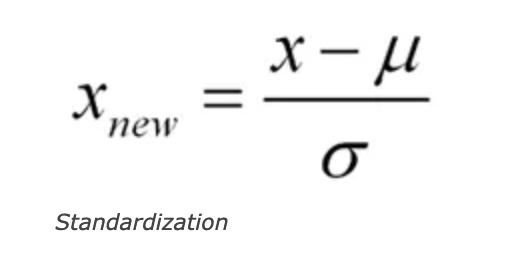

In [ ]:
X_train.head()

,masculino,idade,educação,fumante_atual,cigarros_por_dia,remedioHAS,AVCp,hipertensão_pre,diabetes,colesterol_total,pressao_sistolica,pressao_diastolica,IMC,feq_cardiaca,glicose
1413,1,-1.236973,1.0,1,2.588506,0.0,0,0,0,0.321754,-0.785336,-0.502528,-0.448482,-0.929043,0.725970
1556,0,-0.768662,2.0,0,-0.773467,0.0,0,0,0,-0.553652,-1.639460,-1.747784,-1.576525,-0.178765,-0.091742
2639,0,-0.768662,1.0,0,-0.773467,0.0,0,0,0,0.529087,-0.245889,-0.294985,0.038793,-1.095771,-0.228027
1189,0,-0.183274,1.0,0,-0.773467,0.0,0,1,0,-1.567280,4.968761,4.935093,0.643014,0.738241,-0.228027
2299,1,-0.183274,2.0,0,-0.773467,1.0,0,1,0,2.279900,2.271528,2.071003,0.550432,2.488890,0.635113


In [ ]:
data['10anosDCH'].value_counts()

0    3596
1     644
Name: 10anosDCH, dtype: int64

In [ ]:
data.dtypes

masculino               int64
idade                   int64
educação              float64
fumante_atual           int64
cigarros_por_dia      float64
remedioHAS            float64
AVCp                    int64
hipertensão_pre         int64
diabetes                int64
colesterol_total      float64
pressao_sistolica     float64
pressao_diastolica    float64
IMC                   float64
feq_cardiaca          float64
glicose               float64
10anosDCH               int64
dtype: object

In [ ]:
data['fumante_atual'] = data['fumante_atual'].astype(object)

In [ ]:
data['educação'] = data['educação'].astype(object)

In [ ]:
data['remedioHAS'] = data['remedioHAS'].astype(object)

In [ ]:
data['AVCp'] = data['AVCp'].astype(object)

In [ ]:
data['hipertensão_pre'] = data['hipertensão_pre'].astype(object)

In [ ]:
data['diabetes'] = data['diabetes'].astype(object)

In [ ]:
data.dtypes

masculino               int64
idade                   int64
educação               object
fumante_atual          object
cigarros_por_dia      float64
remedioHAS             object
AVCp                   object
hipertensão_pre        object
diabetes               object
colesterol_total      float64
pressao_sistolica     float64
pressao_diastolica    float64
IMC                   float64
feq_cardiaca          float64
glicose               float64
10anosDCH               int64
dtype: object

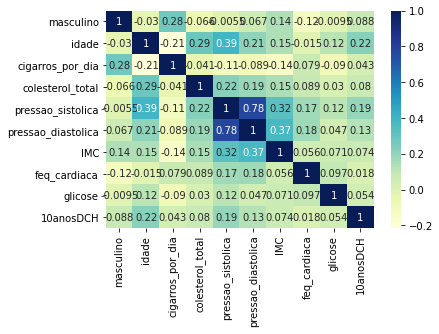

In [ ]:
import seaborn as sns

sns.heatmap(data.corr(method = 'spearman'), annot=True, cmap="YlGnBu")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbc = GradientBoostingClassifier()

In [ ]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
pred = gbc.predict(X_test)

In [ ]:
from sklearn import metrics as m

In [ ]:
print(m.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       905
           1       0.42      0.08      0.14       155

    accuracy                           0.85      1060
   macro avg       0.64      0.53      0.53      1060
weighted avg       0.80      0.85      0.80      1060



In [ ]:
print(m.confusion_matrix(y_test, pred))

[[887  18]
 [142  13]]


# Aqui finalizamos um modelo baseline, sem ainda realizar estratégias de reabalanceamento que poderiam ser béficas, como SMOTE, SMOTE Tomek. Não realizamos hiperparametrização do modelo e utilizamos somente um modelo. 



In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_res.shape

(5382, 15)

In [ ]:
new_model = gbc.fit(X_res, y_res)

In [ ]:
p_res = new_model.predict(X_test)

In [ ]:
print(m.classification_report(y_test, p_res))

              precision    recall  f1-score   support

           0       0.88      0.85      0.87       905
           1       0.28      0.33      0.30       155

    accuracy                           0.78      1060
   macro avg       0.58      0.59      0.58      1060
weighted avg       0.79      0.78      0.78      1060



In [ ]:
prob = new_model.predict_proba(X_test)

In [ ]:
!pip install scikit-plot

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


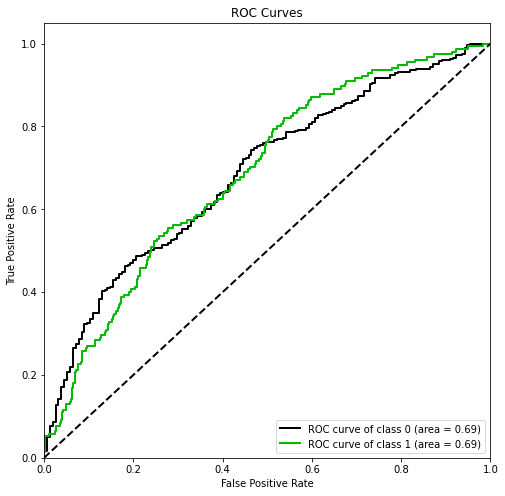

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_roc_curve(y_test, prob, figsize=(8,8), curves='each_class')